In [66]:
import numpy as np
import matplotlib.pyplot as plt
#https://www.youtube.com/watch?v=DcfYgePyedM

Let $y=e^{-x/10} \sin(x)$. Consider 10000 $x$ intervals in the range $[0,10]$

1. Plot the function $y$ vs. $x$ in the range $[0, 10]$.
2. Compute the mean and standard deviation of $y$ for $x$ values in $[4,7]$
3. For $x$ in the range $[4,7]$, find the value $y_m$ such that 80% of $y$ values are less than $y_m$
4. Plot $dy/dx$ vs $x$
5. Find the locations where $dy/dx=0$

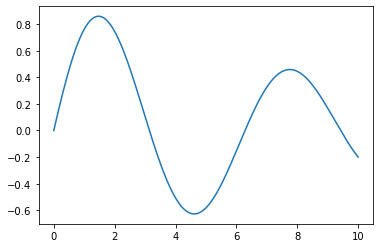

In [51]:
#1 10,000 intervals is 10k + 1 points, 
# think of posts needs for two gates

N = 10_000
# Consider 10000  𝑥  intervals in the range:
x = np.linspace(0, 10, N+1)
y = np.exp(-x/10)*np.sin(x)
plt.plot(x,y)

In [52]:
#2 will need bool indexing! 
# y[(x>=4)*(x<=7)]
np.mean(y[(x>=4)*(x<=7)])
np.std(y[(x>=4)*(x<=7)])

0.31448753875085117

In [53]:
#3 lot of y values in 4 to 7, 80% less
np.percentile(y[(x>=4)*(x<=7)], 80)

0.06145551274590662

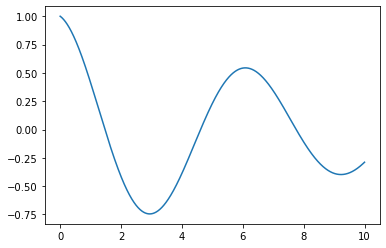

In [54]:
#4
plt.plot(x, np.gradient(y,x)) #derivative y wrt x

In [55]:
#5
dydx = np.gradient(y, x)
dydx

array([ 0.99989984,  0.99979935,  0.9995979 , ..., -0.28918296,
       -0.28892346, -0.28879364])

In [45]:
#trick: when does it swap from postive to negative
#multiply consecutive points along the line
#pos * neg = neg or neg*pos = neg
dydx[1:] 

array([ 0.99979935,  0.9995979 ,  0.99939548, ..., -0.28918296,
       -0.28892346, -0.28879364])

In [46]:
dydx[:-1] 

array([ 0.99989984,  0.99979935,  0.9995979 , ..., -0.28944223,
       -0.28918296, -0.28892346])

In [47]:
dydx[1:] * dydx[1:] #skip the first element, times the first element.. 

array([0.99959875, 0.99919596, 0.99879132, ..., 0.08362679, 0.08347676,
       0.08340177])

In [59]:
dydx[1:] * dydx[1:] < 0

array([False, False, False, ..., False, False, False])

In [63]:
#need correct shape to properly index the boolean mask!! 
print((dydx[1:] * dydx[1:] < 0).shape)
print(x.shape)
print(x[1:].shape)

(10000,)
(10001,)
(10000,)


In [64]:
x[dydx[1:] * dydx[:-1] < 0]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 10001 but corresponding boolean dimension is 10000

In [65]:
x[1:][dydx[1:] * dydx[:-1] < 0]

array([1.472, 4.613, 7.755])